# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
units = 'imperial'
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q='

name = []
lat = []
lng = []
max_temp = []
cloudiness = []
humidity = []
wind_speed = []
country = []
date = []
record=0

print(f'Beginning Data Retrevial')
print(f'------------------------')
    
for city in cities:
    response = requests.get(url+city).json()
#     pprint(response)
   
    try:
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        record = record+1
        city_record = response['name']
        print(f'Prossessing Record {record} of {len(cities)} | {city_record}')
        
    except:
        print('City not found. Skipping...')
        pass

print(f'------------------------')
print(f'Data Retreival Complete')

Beginning Data Retrevial
------------------------
Prossessing Record 1 of 585 | Port Alfred
Prossessing Record 2 of 585 | San Miguel
Prossessing Record 3 of 585 | Vaini
Prossessing Record 4 of 585 | Ushuaia
Prossessing Record 5 of 585 | Port-Gentil
Prossessing Record 6 of 585 | Albany
Prossessing Record 7 of 585 | Māngrol
Prossessing Record 8 of 585 | Lebu
Prossessing Record 9 of 585 | Eureka
Prossessing Record 10 of 585 | Saint George
City not found. Skipping...
Prossessing Record 11 of 585 | Jamestown
Prossessing Record 12 of 585 | Maravilha
Prossessing Record 13 of 585 | George Town
Prossessing Record 14 of 585 | Rikitea
Prossessing Record 15 of 585 | Dikson
Prossessing Record 16 of 585 | Bengkulu
Prossessing Record 17 of 585 | Klyuchi
Prossessing Record 18 of 585 | Altay
Prossessing Record 19 of 585 | Kapaa
Prossessing Record 20 of 585 | Narsaq
Prossessing Record 21 of 585 | Kumhāri
Prossessing Record 22 of 585 | Ponta do Sol
Prossessing Record 23 of 585 | Nuuk
Prossessing Record 2

Prossessing Record 188 of 585 | Batagay-Alyta
Prossessing Record 189 of 585 | Nizhnetroitskiy
Prossessing Record 190 of 585 | Castro
Prossessing Record 191 of 585 | Kastamonu Province
Prossessing Record 192 of 585 | Tual
Prossessing Record 193 of 585 | Acapulco de Juárez
Prossessing Record 194 of 585 | Isla del Bosque
City not found. Skipping...
Prossessing Record 195 of 585 | Póvoa de Varzim
Prossessing Record 196 of 585 | Northam
Prossessing Record 197 of 585 | Myaundzha
Prossessing Record 198 of 585 | San Patricio
Prossessing Record 199 of 585 | Buraidah
Prossessing Record 200 of 585 | Tazovsky
Prossessing Record 201 of 585 | Muisne
Prossessing Record 202 of 585 | Aban
Prossessing Record 203 of 585 | Alyangula
Prossessing Record 204 of 585 | Rathdrum
Prossessing Record 205 of 585 | Esperance
Prossessing Record 206 of 585 | Qaanaaq
Prossessing Record 207 of 585 | Bonthe
Prossessing Record 208 of 585 | Micheweni
Prossessing Record 209 of 585 | Plettenberg Bay
Prossessing Record 210 of

Prossessing Record 378 of 585 | Zhezkazgan
Prossessing Record 379 of 585 | Tahoua
Prossessing Record 380 of 585 | Bethel
Prossessing Record 381 of 585 | Kingsport
Prossessing Record 382 of 585 | Sur
Prossessing Record 383 of 585 | Maun
City not found. Skipping...
Prossessing Record 384 of 585 | Andilamena
Prossessing Record 385 of 585 | Phonhong
Prossessing Record 386 of 585 | San Cristobal
Prossessing Record 387 of 585 | Puerto Escondido
Prossessing Record 388 of 585 | Luanda
Prossessing Record 389 of 585 | Klaksvík
Prossessing Record 390 of 585 | Tevaitoa
Prossessing Record 391 of 585 | Oriximiná
Prossessing Record 392 of 585 | Novominskaya
Prossessing Record 393 of 585 | Ahipara
Prossessing Record 394 of 585 | Faya
Prossessing Record 395 of 585 | Mahārāganj
Prossessing Record 396 of 585 | Rocha
Prossessing Record 397 of 585 | Birao
Prossessing Record 398 of 585 | Cockburn Town
City not found. Skipping...
Prossessing Record 399 of 585 | Afonso Cláudio
Prossessing Record 400 of 585 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({
    'City' : name,
    'Lat' : lat,
    'Lng' : lng,
    'Max Temp' : max_temp,
    'Humidity' : humidity,
    'Cloudiness' : cloudiness,
    'Wind Speed' : wind_speed,
    'Country' : country,
    'Date': date
})
weather_df.to_csv(r'../output_data/cities.csv', index=False)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,70.41,77,13,24.87,ZA,1611605802
1,San Miguel,13.4833,-88.1833,98.60,36,0,9.22,SV,1611605802
2,Vaini,-21.2000,-175.2000,80.60,89,20,6.91,TO,1611605803
3,Ushuaia,-54.8000,-68.3000,53.60,40,40,9.22,AR,1611605803
4,Port-Gentil,-0.7193,8.7815,80.60,83,40,4.61,GA,1611605803


In [5]:
stats = weather_df.describe()
stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,539.000000,539.000000,539.000000,539.00000,539.000000,539.000000,5.390000e+02
mean,20.837508,19.181996,48.441002,73.74026,55.914657,8.487069,1.611606e+09
std,33.406795,90.399289,34.975250,19.03175,40.344660,6.210230,6.588863e+01
min,-54.800000,-179.166700,-54.130000,11.00000,0.000000,0.360000,1.611605e+09
25%,-7.085150,-58.302350,31.035000,66.00000,9.500000,3.690000,1.611606e+09
50%,25.357300,26.459700,62.010000,78.00000,75.000000,6.910000,1.611606e+09
75%,49.329100,96.094250,76.525000,87.00000,97.000000,11.555000,1.611606e+09
max,78.218600,179.316700,98.600000,100.00000,100.000000,33.910000,1.611606e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidity = weather_df.loc[weather_df['Humidity']>=100]
humidity.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
48,Zheleznodorozhnyy,55.7503,38.0042,34.00,100,90,13.42,RU,1611605809
162,Mariehamn,60.0973,19.9348,32.00,100,90,4.61,AX,1611605759
169,Arkhangelsk,64.5401,40.5433,33.80,100,90,6.71,RU,1611605825
194,Póvoa de Varzim,41.3834,-8.7636,57.20,100,75,2.30,PT,1611605829
248,Airai,-8.9266,125.4092,60.53,100,100,3.00,TL,1611605836


In [9]:
#  Get the indices of cities that have humidity over 100%.
h_index=list(np.where(weather_df['Humidity']>=100))
print(h_index)

[array([ 48, 162, 169, 194, 248, 266, 268, 291, 357, 438, 452, 492],
      dtype=int64)]


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_data = weather_df.drop(weather_df.index[h_index], axis=0, inplace=False)
city_data

C:\Users\krist\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexes\base.py:3941: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,70.41,77,13,24.87,ZA,1611605802
1,San Miguel,13.4833,-88.1833,98.60,36,0,9.22,SV,1611605802
2,Vaini,-21.2000,-175.2000,80.60,89,20,6.91,TO,1611605803
3,Ushuaia,-54.8000,-68.3000,53.60,40,40,9.22,AR,1611605803
4,Port-Gentil,-0.7193,8.7815,80.60,83,40,4.61,GA,1611605803
...,...,...,...,...,...,...,...,...,...
534,Bintulu,3.1667,113.0333,78.01,94,40,9.22,MY,1611605874
535,Baykit,61.6700,96.3700,-38.99,76,23,1.14,RU,1611605875
536,Ucluelet,48.9329,-125.5528,41.00,87,75,2.30,CA,1611605710
537,Antalaha,-14.9003,50.2788,78.67,81,97,1.36,MG,1611605875


In [11]:
len(city_data)

527

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

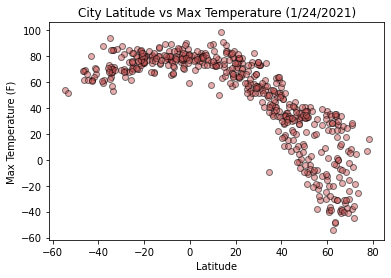

In [12]:
x=city_data['Lat']
y=city_data['Max Temp']

plt.scatter(x, y, facecolor = 'indianred', alpha = .5, edgecolor='k')
plt.title('City Latitude vs Max Temperature (1/24/2021)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.savefig('../output_data/lat_max_temp.png')

plt.show()

**City Latitude vs Max Temperature Observations**

The data shown in this graph seem to show a relationship between the latitude of a city and max temperature. Cities at similar latitudes tend to have a similar range of temperatures with only a few outliers. You could infer from this data that if you chose another city at the same latitude as one on the graph, you would get similar max temperature data. 

## Latitude vs. Humidity Plot

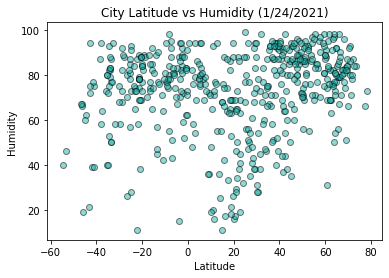

In [13]:
x=city_data['Lat']
y=city_data['Humidity']

plt.scatter(x, y, facecolor = 'lightseagreen', alpha = .5, edgecolor='k')
plt.title('City Latitude vs Humidity (1/24/2021)')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.savefig('../output_data/lat_humidity.png')

plt.show()

**City Latitude vs Humidity Observations**

The data represented in the graph does not seem to have any patterns. Based on the data shown, we cannot use the latitude of a city as a predictor of the humidity level. This can be supported by the way the data seems fairly evenly distributed across the entire graph.

## Latitude vs. Cloudiness Plot

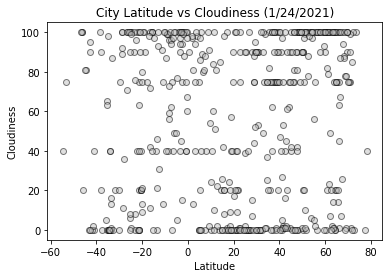

In [14]:
x=city_data['Lat']
y=city_data['Cloudiness']

plt.scatter(x, y, facecolor = 'silver', alpha = .5, edgecolor='k')
plt.title('City Latitude vs Cloudiness (1/24/2021)')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.savefig('../output_data/lat_cloud.png')

plt.show()

**City Latitude vs Cloudiness Observations**

Based on the data it doesn't seem that you can predict the level of cloudiness based on the latitude of a city. However, there are clusters of data on 100%, 90%, 75%, 40%, 20%, and 0%. This may suggest that areas tend to use measurements with either five or zero on the end more frequently than others when describing the level of cloudiness. It would be interesting to look at reporting standards to see if there were similarities between the cities that are clustered around the values 100%, 90%, 75%, 40%, 20%, and 0%.

## Latitude vs. Wind Speed Plot

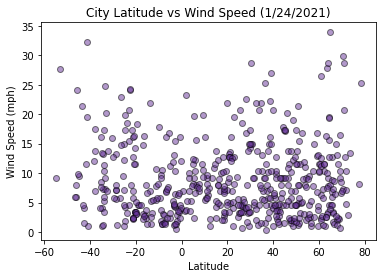

In [15]:
x=city_data['Lat']
y=city_data['Wind Speed']

plt.scatter(x, y, facecolor = 'rebeccapurple', alpha = .5, edgecolor='k')
plt.title('City Latitude vs Wind Speed (1/24/2021)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.savefig('../output_data/lat_wind.png')

plt.show()

**City Latitude vs Wind Speed Observations**

There does not seem to be a correlation between latitude and wind speed. The data is clustered fairly evenly across the latitudes and different wind speeds. One observation that may be inferred is that the majority of wind speeds tend to be below 20 mph. 

## Linear Regression

In [16]:
n_hemi = city_data.loc[(city_data['Lat'] >= 0) & (city_data['Lat'] <= 90)]
len(n_hemi)

358

In [17]:
s_hemi = city_data.loc[(city_data['Lat'] >= -90) & (city_data['Lat'] < 0)]
len(s_hemi)

169

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7290947558340748


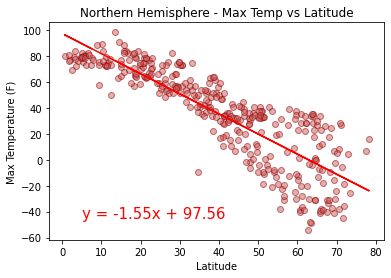

In [18]:
x_values = n_hemi['Lat']
y_values = n_hemi['Max Temp']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'indianred', 
            alpha = .5, edgecolor='darkred')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (5,-45), fontsize=15, color="red")

plt.title('Northern Hemisphere - Max Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/nh_lat_max.png')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.262258689063127


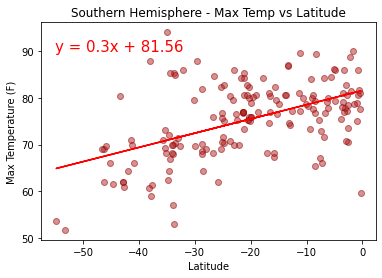

In [20]:
x_values = s_hemi['Lat']
y_values = s_hemi['Max Temp']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'firebrick', 
            alpha = .5, edgecolor='darkred')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (-55, 90), fontsize=15, color="red")

plt.title('Southern Hemisphere - Max Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/sh_lat_max.png')

plt.show()

**Observations of Northern and Southern Hemisphere comparison of Max Temp vs Latitude**

When comparing these two graphs, there seems to be a much stronger correlation between temperature and latitude in the northern hemisphere. However, the data points are not evenly split between northern and southern hemispheres. This may be causing some skew in the data. Both graphs seem to show that temperatures tend to rise as one moves closer to 0 degrees latitude. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12472929405898209


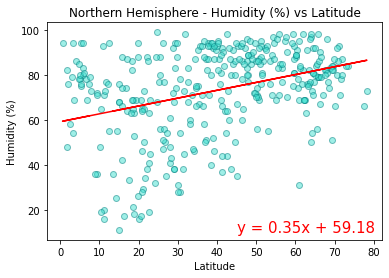

In [21]:
x_values = n_hemi['Lat']
y_values = n_hemi['Humidity']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'turquoise', 
            alpha = .5, edgecolor='teal')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (45,10), fontsize=15, color="red")

plt.title('Northern Hemisphere - Humidity (%) vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/nh_lat_humidity.png')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0591618997761555


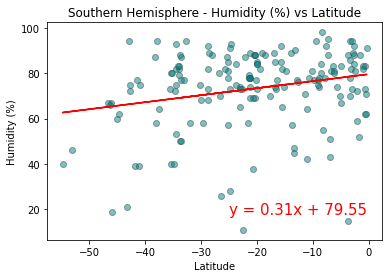

In [22]:
x_values = s_hemi['Lat']
y_values = s_hemi['Humidity']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'teal', 
            alpha = .5, edgecolor='darkslategrey')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (-25, 18), fontsize=15, color="red")

plt.title('Southern Hemisphere - Humidity (%) vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/sh_lat_humidity.png')

plt.show()

**Observations of Northern and Southern Hemisphere comparison of Humidity vs Latitude**

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05089381304071591


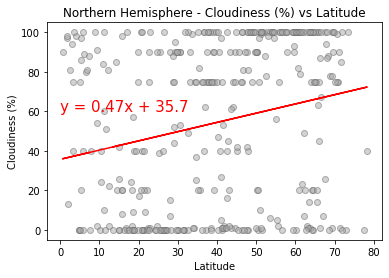

In [24]:
x_values = n_hemi['Lat']
y_values = n_hemi['Cloudiness']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'darkgray', 
            alpha = .5, edgecolor='dimgray')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (0,60), fontsize=15, color="red")

plt.title('Northern Hemisphere - Cloudiness (%) vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/nh_lat_cloud.png')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10254991266917517


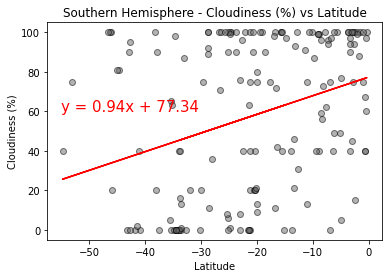

In [26]:
x_values = s_hemi['Lat']
y_values = s_hemi['Cloudiness']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'dimgray', 
            alpha = .5, edgecolor='k')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (-55, 60), fontsize=15, color="red")

plt.title('Southern Hemisphere - Cloudiness (%) vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/sh_lat_cloud.png')

plt.show()

**Observations of Northern and Southern Hemisphere comparison of Cloudiness vs Latitude**


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0011732635801476618


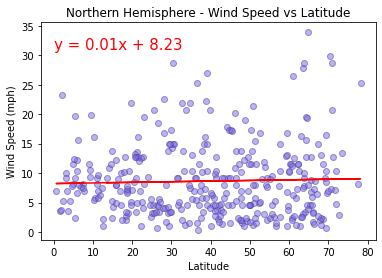

In [29]:
x_values = n_hemi['Lat']
y_values = n_hemi['Wind Speed']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'mediumslateblue', 
            alpha = .5, edgecolor='darkslateblue')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (0,31), fontsize=15, color="red")

plt.title('Northern Hemisphere - Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/nh_lat_wind.png')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10106059724220154


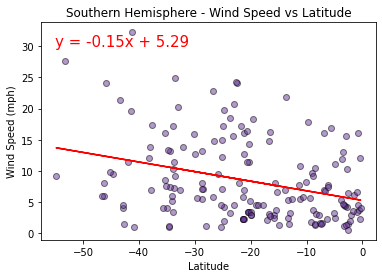

In [32]:
x_values = s_hemi['Lat']
y_values = s_hemi['Wind Speed']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'rebeccapurple', 
            alpha = .5, edgecolor='k')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (-55, 30), fontsize=15, color="red")

plt.title('Southern Hemisphere - Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/sh_lat_wind.png')

plt.show()

**Observations of Northern and Southern Hemisphere comparison of Wind Speed vs Latitude**